In [24]:
import datetime
import logging
import pickle
import matplotlib.pyplot as plt
from collections import namedtuple

GameState = namedtuple("GameState", ["timestamp", "price", "in_stock"])


class Game:
    def __init__(self, title):
        self.title = title
        self._states = []

    @property
    def state(self):
        return self._states[-1]

    @property
    def states(self):
        return list(self._states)

    @property
    def creation_date(self):
        return self._states[0].timestamp

    def add_state(self, new_state):
        if len(self._states) > 0:
            if all([self.state[x] == new_state[x] for x in range(1, len(GameState._fields))]):
                return  # new state is the same as the last excluding timestamp
        self._states.append(new_state)


def plot_games(games_in, display_legend=None):
    display_legend = display_legend if display_legend is not None else True

    fig = plt.figure(figsize=(18, 6), dpi=80)
    for game in games_in:
        filtered = list(filter(lambda g: g.in_stock, game.states))
        if filtered and filtered[-1].in_stock:
            filtered = filtered + [GameState(datetime.datetime.now(), filtered[-1].price, filtered[-1].in_stock)]
        prices = [x.price for x in filtered]
        time = [x.timestamp for x in filtered]
        plt.plot(time, prices)

    if display_legend:
        plt.legend(list([g.title for g in games_in]), borderpad=1, bbox_to_anchor=(1, 1))
    plt.show()


try:
    with open("games.db", "rb") as fb:
        db = pickle.load(fb)
except FileNotFoundError:
    db = {}

print("Loaded {} records.".format(len(db.items())))


Loaded 952 records.


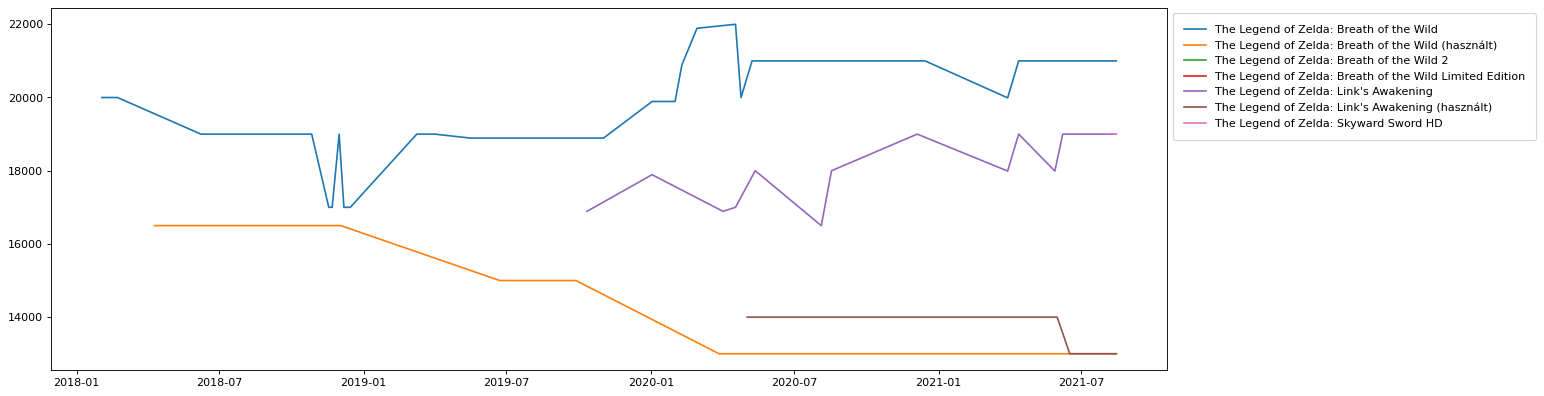

In [25]:
all_games = list(sorted(filter(lambda g: True, db.values()), key=lambda k: k.title))
games_currently_in_stock = list(sorted(filter(lambda g: g.state.in_stock, db.values()), key=lambda k: k.title))

selected_games = list(filter(lambda g: 'zelda' in g.title.lower(), all_games))
plot_games(selected_games, True)


In [26]:
print(list(filter(lambda t: 'pokémon' in t.lower(), [g.title for g in db.values()])))

["Pokémon Let's Go Eevee", "Pokémon Let's Go Pikachu", "Pokémon Let's Go Pikachu! + Poké Ball Plus", "Pokémon Let's Go Eevee! + Poké Ball Plus", 'Pokémon Sword', 'Pokémon Shield', "Pokémon Let's Go Eevee (használt)", 'Pokémon Mystery Dungeon: Rescue Team DX', 'Pokémon Shield (használt)', "Pokémon Let's Go Pikachu (használt)", 'Pokémon Sword (használt)', 'Pokémon Mystery Dungeon: Rescue Team DX (használt)', 'Pokémon Sword + Expansion Pass', 'Pokémon Shield + Expansion Pass', 'New Pokémon Snap', 'Pokémon Brilliant Diamond + Shining Pearl Dual Pack', 'Pokémon Shining Pearl', 'Pokémon Brilliant Diamond']


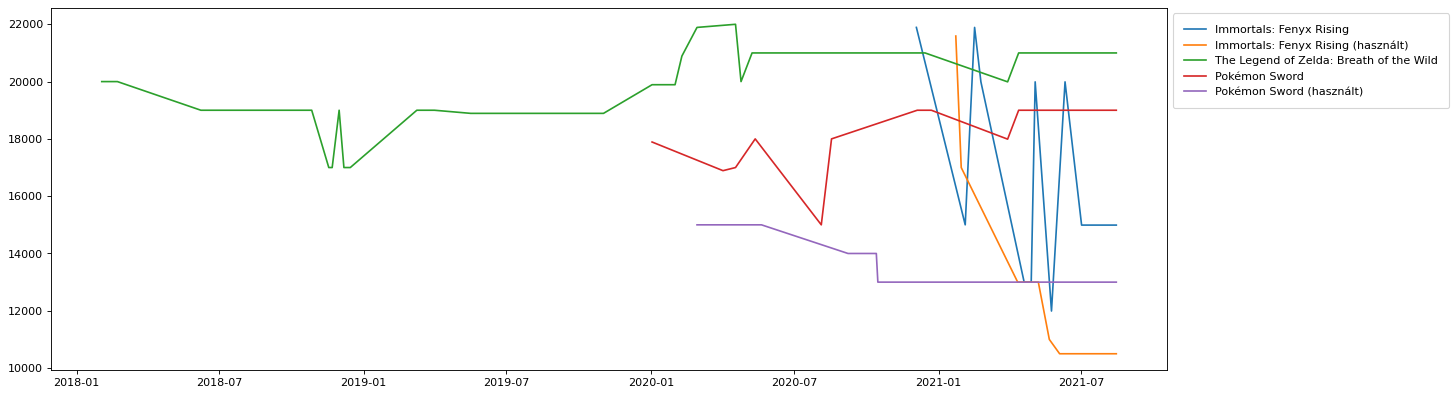

In [27]:
titles = [
    "Immortals: Fenyx Rising",
    "Immortals: Fenyx Rising (használt)",
    "The Legend of Zelda: Breath of the Wild",
    "Pokémon Sword",
    "Pokémon Sword (használt)"
]
games = list([db[title] for title in titles])
plot_games(games, True)
